Импорт библиотек

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#Задание функций, градиентов и гессианов

f = $x^2 + y^2 + z^2$ (минимум в 0)

g = $x^3 + y^3 - 3xy$  (минимума нет)

check_fun = $-2x_0^3 + 4x_0^2 + x_1^4 - 3x_1^2 + 2x_2^2 * x_1 - 5x_2 + x_3^4 - x_3^2 * x_0^2 - 10$ (минимума нет)

fun4 = $(x_0+3)^4 + (x_1-1)^2 + (x_2-2)^2 + (x_3+x_0)^2$ (минимум = 0 в точке (-3, 1, 2, 3))

In [31]:
def f(x):
    x,y,z = x
    return x**2 + y**2 + z**2

def grad_f(x):
    x,y,z = x
    return np.array([2*x, 2*y, 2*z])

def hessian_f(x):
    x,y,z = x
    return np.array([[2, 0, 0],
                    [0, 2, 0],
                    [0, 0, 2]])

def g(x):
    x, y = x
    return x**3 + y**3 - 3*x*y

def grad_g(x):
    x, y = x
    return np.array([3*x**2 - 3*y, 3*y**2 - 3*x])

def hessian_g(x):
    x, y = x
    return np.array([[6*x, -3],
                    [-3, 6*y]])

def check_fun(x):
    x0,x1,x2,x3=x
    return -2*x0**3 + 4*x0**2 + x1**4 - 3*x1**2 + 2*x2**2 * x1 - 5*x2 + x3**4 - x3**2 * x0**2 - 10
def grad_check_fun(x):
    x0,x1,x2,x3=x
    return np.array([-6*x0**2 + 8*x0 - 2*x3**2 * x0,
            4*x1**3 - 6*x1 + 2*x2**2,
            4*x2 * x1 - 5,
            4*x3**3 - 2*x3 * x0**2])
def hessian_check_fun(x):
    x0,x1,x2,x3=x
    return np.array([[-12*x0 + 8 - 2*x3**2, 0, 0, -4*x3*x0],
            [0, 12*x1**2 - 6, 4*x2, 0],
            [0, 4*x2, 4*x1, 0],
            [-4*x3*x0, 0, 0, 12*x3**2 - 2*x0**2]])

def fun4(x):
    x0, x1, x2, x3 = x
    return (x0+3)**4 + (x1-1)**2 + (x2-2)**2 + (x3+x0)**2
def grad_fun4(x):
    x0, x1, x2, x3 = x
    return [4*(x0+3)**3 + 2*(x3+x0),
            2*(x1-1), 2*(x2-2), 2*(x3+x0)]
def hessian_fun4(x):
    x0, x1, x2, x3 = x
    return [[12*(x0+3)**2 + 2,0,0,2],
            [0,2,0,0], [0,0,2,0], [2,0,0,2]]

def fun5(x):
    x0,x1,x2,x3=x
    return -2*x0**3+4*x0**2+x1**4-3*x1**3-4*x2**3+2*x2**4-5*x3+x3**2+10+x0+x1+x2+x3
def grad_fun5(x):
    x0,x1,x2,x3=x
    return [-6*x0**2+8*x0+1,  4*x1**3-9*x1**2+1,
            -12*x2**2+8*x2**3+1,    -5+2*x3+1]
def hessian_fun5(x):
    x0,x1,x2,x3=x
    return [[-12*x0+8,0,0,0],   [0,12*x1**2-18*x1,0,0],
            [0,0,-24*x2+24*x2**2,0],  [0,0,0,2]]

#Проверка на выпуклость

Метод сопряенных градиентов применим только для выпуклых функций, поэтому сначала надо проверить на выпуклость

In [32]:
def check_convexity(func, grad_func, hessian_func, x_range):
    for x in x_range:
        H = hessian_func(x)
        eigenvalues = np.linalg.eigvals(H)
        if not np.all(eigenvalues >= 0):
            return False
    return True

In [33]:
x = np.linspace(-10, 10, 10)

# Проверка выпуклости f(x, y, z)
x_range = np.array(np.meshgrid(x, x, x)).T.reshape(-1, 3)
is_convex = check_convexity(f, grad_f, hessian_f, x_range)
print(f"f(x, y, z) is convex: {is_convex}")

# Проверка выпуклости g(x, y)
y_range = np.array(np.meshgrid(x, x)).T.reshape(-1, 2)
is_convex = check_convexity(g, grad_g, hessian_g, y_range)
print(f"g(x, y) is convex: {is_convex}")

#Проверка выпуклости check_fun(x,x,x,x)
check_x_range = np.array(np.meshgrid(x, x, x, x)).T.reshape(-1, 4)
is_convex = check_convexity(check_fun, grad_check_fun, hessian_check_fun, check_x_range)
print(f"check_fun(x, y, z, k) is convex: {is_convex}")

#Проверка выпуклости fun4(x,x,x,x)
fun4_x_range = np.array(np.meshgrid(x, x, x, x)).T.reshape(-1, 4)
is_convex = check_convexity(fun4, grad_fun4, hessian_fun4, fun4_x_range)
print(f"fun4(x, y, z, k) is convex: {is_convex}")

#Проверка выпуклости fun5(x,x,x,x)
fun5_x_range = np.array(np.meshgrid(x, x, x, x)).T.reshape(-1, 4)
is_convex = check_convexity(fun5, grad_fun5, hessian_fun5, fun5_x_range)
print(f"fun5(x, y, z, k) is convex: {is_convex}")

f(x, y, z) is convex: True
g(x, y) is convex: False
check_fun(x, y, z, k) is convex: False
fun4(x, y, z, k) is convex: True
fun5(x, y, z, k) is convex: False


# Реализация действий с матрицами

In [34]:
# перемножение числа и вектора
def mult(a, arr):
    return np.array([i*a for i in arr])

# сложение двух векторов
def add(arr1, arr2):
    try:
        return np.array([arr1[i]+arr2[i] for i in range(len(arr1))])
    except TypeError:
        arr1+arr2[0]

# Скалярное произведение
def mydot(arr1, arr2):
    try:
        ans=0
        for i in range(len(arr1)):
            ans+=arr1[i]*arr2[i]
        return ans
    except:
        return arr1*arr2[0]
# взятие нормы вектора
def norm(arr):
    return sum(i**2 for i in arr)**0.5

# реализация численного приближения градиента
def my_grad(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        xh = x.copy()
        x_h = x.copy()
        xh[i] += h
        x_h[i] -= h
        grad[i] = (f(xh) - f(x_h))/h/2
    return grad

# Реализация метода сопряженных градиентов

In [35]:
def conjugate_gradient5(f, grad_f, x0, tol=1e-6, max_iter=200, alpha_max=1.0, c=0.5, rho=0.5, alpha_min=1e-8, max_f = 1e15):
    """
    Метод сопряженных градиентов с backtracking line search.

    Args:
    f: Функция, для которой нужно найти минимум.
    grad_f: Градиент функции.
    x0: Начальная точка поиска.
    tol: Допустимая погрешность.
    max_iter: Максимальное количество итераций.
    alpha_max: Максимальная длина шага.
    c: Параметр для backtracking line search.
    rho: Параметр для backtracking line search.
    alpha_min: Минимальная длина шага.
    max_f: Максимально допустимое значение f, иначе считаем = null.

    Returns:
    ans = {"message", "status", "nit", "x", "f_min": arr_f[-1], "arr_f": arr_f}
    """
    arr_f = [f(x0)]
    x = x0
    r = mult(-1, my_grad(f, x))
    d = r

    ans = {"message": "ok",
           "status": 0,
           "nit": 0,
           "x": x,
           "f_min": arr_f[-1],
           "arr_f": arr_f}

    for i in range(max_iter):
        ans["nit"]+=1
        alpha = alpha_max
        # Продвинутый поиск по линии с обратным шагом
        while f(add(x, mult(alpha, d))) > f(x) + c * alpha * mydot(my_grad(f, x), d) and alpha > alpha_min:
            alpha *= rho

        if abs(f(x))>=max_f:
            ans["message"] = 'too big f or too small'
            ans["x"], ans["f_min"], ans["arr_f"], ans["status"] = x, arr_f[-1], arr_f, 1
            return ans
        if alpha < alpha_min:  # Если шаг слишком мал, прерываем
            ans["message"] = 'too small alpha'
            ans["x"], ans["f_min"], ans["arr_f"], ans["status"] = x, arr_f[-1], arr_f, 2
            return ans

        x = add(x, mult(alpha, d))
        arr_f.append(f(x))
        r_new = mult(-1, my_grad(f, x))
        beta = mydot(r_new, r_new) / mydot(r, r)
        d = add(r_new, mult(beta, d))
        r = r_new

        # Проверка условия сходимости
        if norm(r) < tol:
            break

    ans["x"], ans["f_min"], ans["arr_f"] = x, arr_f[-1], arr_f
    return ans

#Применение метода сопряженных градиентов

In [36]:
# Начальные точки
x0_1 = [1, 1, 6]
x0_2 = [8, -2]
check_x_0 = [-1,-1,-1,-1]
fun4_x0 = [-1,0.5,0.5,0.5]
fun5_x0=[-0.5,2.5,1.5,2.0]

In [37]:
res1 = conjugate_gradient5(f, grad_f, x0_1)
res2 = conjugate_gradient5(g, grad_g, x0_2)
check_res = conjugate_gradient5(check_fun, grad_check_fun, check_x_0)
res4 = conjugate_gradient5(fun4, grad_fun4, fun4_x0)
res5 = conjugate_gradient5(fun5, grad_fun5, fun5_x0)

In [45]:
def to_float(value):
    try:
      arr = []
      for i in value:
        arr.append("{:.2f}".format(i))
      return arr
    except:
      return "{:.2f}".format(value)

res_arr = [res1, res2, check_res, res4, res5]
res_name = ["1", "2", "3", "4", "5"]
for i in range(len(res_arr)):
    n = res_name[i]
    r = res_arr[i]
    x, f, arr_f, s = r["x"], r["f_min"], r["arr_f"], r["status"],
    # print(f"x_min{n}: {to_float(x)}, f_min{n} = {to_float(f)} in {len(arr_f)} iterations with status = {s}")
    print("_"*30)
    print(f"\t resses for fun{n}")
    print("_"*30)
    for j in r: print(j,":", r[j])

______________________________
	 resses for fun1
______________________________
message : ok
status : 0
nit : 14
x : [-3.67238076e-08 -3.67238076e-08 -1.87282572e-07]
f_min : 3.777203792212465e-14
arr_f : [38, 0.75, 0.1524390243898475, 0.010501657291865944, 0.0010621855734527532, 9.182738493142327e-05, 8.46359985638574e-06, 7.598719986195372e-07, 6.895907784466114e-08, 6.230622126651575e-09, 5.6396734732375e-10, 5.1010080290019146e-11, 4.615187054296087e-12, 4.1751189745368417e-13, 3.777203792212465e-14]
______________________________
	 resses for fun2
______________________________
message : too big f or too small
status : 1
nit : 3
x : [-58194131.7081309    3242624.75525305]
f_min : -1.970436465556398e+23
arr_f : [552, -6745437.0, -1.970436465556398e+23]
______________________________
	 resses for fun3
______________________________
message : too big f or too small
status : 1
nit : 3
x : [ 4.23473057e+04 -1.01930764e+04 -1.20000000e+01  7.18505095e+03]
f_min : -7.92705188228059e+16
a

#Графики

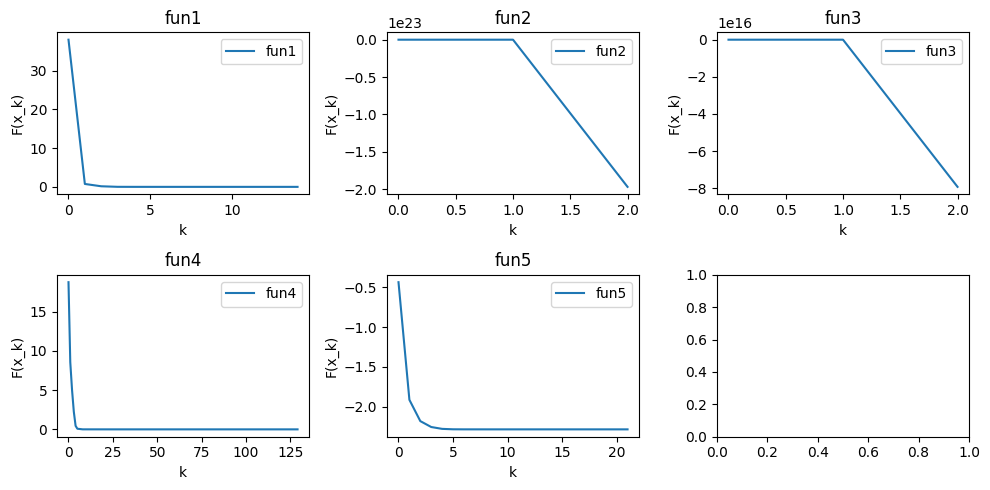

In [46]:
import matplotlib.pyplot as plt
n = len(res_arr)
# Создаем фигуру и оси для трех графиков
fig, axs = plt.subplots(2, n//2+n%2, figsize=(10, n))
cnt = 1
for i in range(2):
    for j in range(n//2+n%2):
        # print(i,j,i*n//2+n%2+j+i)
        r = res_arr[cnt-1]
        r_name = "fun"+res_name[cnt-1]
        axs[i][j].plot(range(len(r["arr_f"])), r["arr_f"], label=r_name)
        axs[i][j].set_xlabel("k")
        axs[i][j].set_ylabel("F(x_k)")
        axs[i][j].set_title(r_name)
        axs[i][j].legend()

        cnt += 1
        if cnt > n: break
    if cnt > n: break


# Показываем графики
plt.tight_layout()  # Для улучшения расположения графиков
plt.show()

Аналогично: первая функция нашла свой минимум за 2 итерации, 2-я не нашла минимум корректно (значения после 3-й итерации = nan, что не отображено на графике), 3-я тоже ничего не нашла на третьей итерации став = nan, а вот 4-я за 138 итераций вполне успешно нашла минимум